In [8]:
import matplotlib.pyplot as plt
import numpy as np
from time import time
import csv
from tabulate import tabulate
%matplotlib inline

# Data Handling

In [28]:
strategies = ['noret', 'all', 'old', 'traf', 'betw', 'clust', 'highmod']
vmt = {}
#total_time = {}
trips = {}
#tt_per_trip = {}
vmt_per_trip = {}

for strat in strategies:
    vmt[strat] = []
    #total_time[strat] = []
    trips[strat] = []
    #tt_per_trip[strat] = []
    vmt_per_trip[strat] = []

output_filenames  = ['traffic_output_50_old.csv','traffic_output_50_betw_partial.csv',
                     'traffic_output_50_traf.csv', 'quick_traffic_model/traffic_output_norets_RY_0609.csv',
                     'quick_traffic_model/traffic_output_allrets_RY_0609.csv']

for filename in output_filenames:
    with open(filename, 'r') as output_file:
        reader = csv.reader(output_file)
        next(reader)
        for row in reader:
            pkl_file = row[1]
            for strat in strategies:
                if strat in pkl_file:
                    vmt_orig = float(row[4])
                    vmt_new = float(row[5])
                    #tt_orig = float(row[2])
                    #tt_new = float(row[3])
                    trips_orig = float(row[7])
                    trips_new = float(row[6])
                    
                    vmt[strat].append(100*(vmt_new/vmt_orig - 1))
                    #total_time[strat].append(100*(tt_new/tt_orig - 1))
                    trips[strat].append(100 * (trips_new/trips_orig))
                    vmt_per_trip[strat].append(100*((vmt_new/trips_new)/(vmt_orig/trips_orig) - 1))
                    #tt_per_trip[strat].append(100*((tt_new/trips_new)/(tt_orig/trips_orig) - 1))
                    break

full_titles = {'noret': 'No Retrofits Baseline',
               'all': 'All Retrofits',
               'old': 'Oldest Bridges Ranking',
               'traf': 'Highest-Traffic Ranking',
               'clust': 'Local Clustering Strategy',
               'betw': 'Betweenness Strategy',
               'highmod': 'High Modularity Strategy'}

# Scatterplot

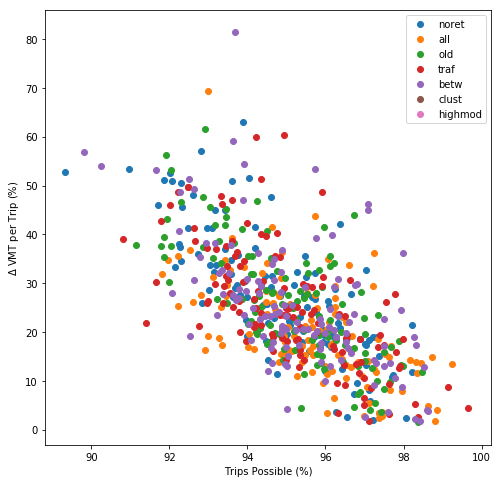

In [29]:
plt.figure(figsize=(8,8))
for strat in strategies:
    plt.scatter(trips[strat], vmt_per_trip[strat], label=strat)
plt.xlabel('Trips Possible (%)')
plt.ylabel('$\Delta$ VMT per Trip (%)')
plt.legend()
plt.show()

#plt.figure(figsize=(8,8))
#for strat in strategies:
#    plt.scatter(trips[strat], tt_per_trip[strat], label=strat)
#plt.xlabel('Trips Possible (%)')
#plt.ylabel('$\Delta$ Travel Time per Trip (%)')
#plt.legend()
#plt.show()

# Stats

In [30]:
statistics = []
headers = ['trips_median', 'trips_mean', 'trips_stdev', 'vmt/trip_median', 'vmt/trip_mean', 'vmt/trip_stdev',]

for strat in strategies:
    strat_stats = [strat]
    strat_stats.append(np.median(trips[strat]))
    strat_stats.append(np.mean(trips[strat]))
    strat_stats.append(np.std(trips[strat]))
    strat_stats.append(np.median(vmt_per_trip[strat]))
    strat_stats.append(np.mean(vmt_per_trip[strat]))
    strat_stats.append(np.std(vmt_per_trip[strat]))
    statistics.append(strat_stats)
        
print tabulate(statistics, headers)

           trips_median    trips_mean    trips_stdev    vmt/trip_median    vmt/trip_mean    vmt/trip_stdev
-------  --------------  ------------  -------------  -----------------  ---------------  ----------------
noret           95.0774       94.9365        1.72316            25.5296          26.8883           12.7378
all             95.6633       95.6101        1.62767            18.4505          20.1092           10.1913
old             95.2441       95.1281        1.63075            24.5055          25.4646           11.9027
traf            94.9451       95.0563        1.72876            23.8445          25.2977           12.2667
betw            95.0055       95.2231        1.74643            23.1984          25.3764           13.174
clust          nan           nan           nan                 nan              nan               nan
highmod        nan           nan           nan                 nan              nan               nan


# Histograms

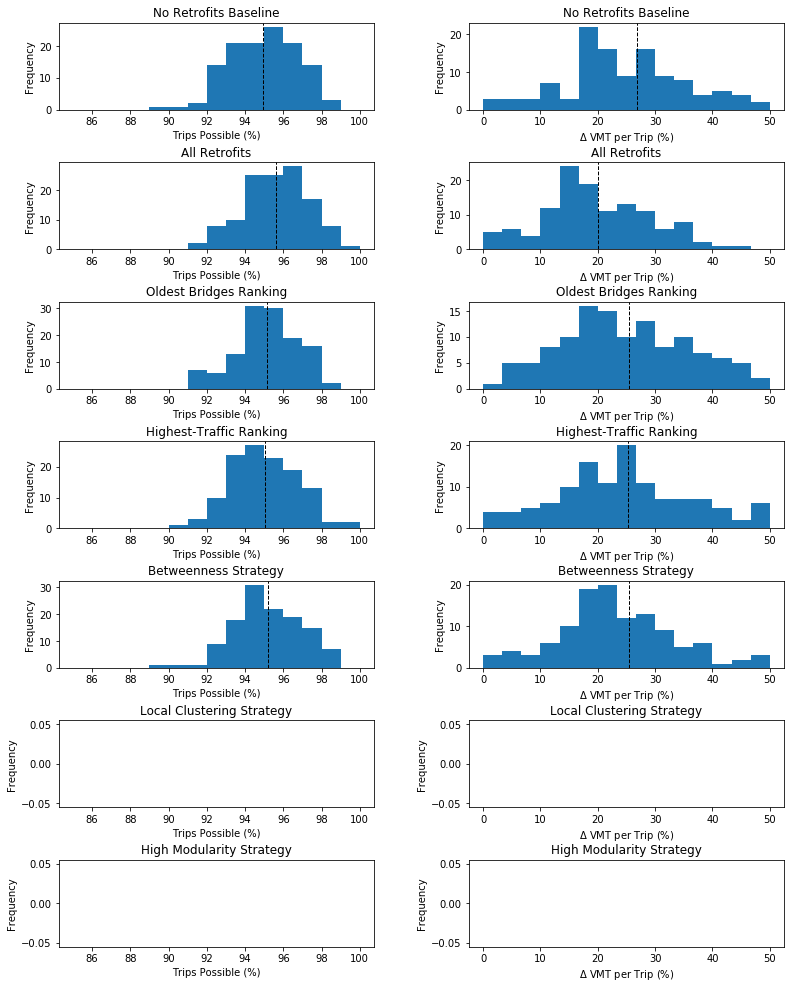

In [31]:
count = 1
plt.figure(figsize=(13,17))
for strat in strategies:
    #plt.subplot(len(strategies), 3, count)
    #plt.hist(total_time[strat], range=(-100, 400), bins=15)
    #plt.title(full_titles[strat])
    #plt.xlabel('Travel Time Increase (%)')
    #plt.ylabel('Frequency')
    #plt.axvline(np.mean(total_time[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(strategies), 2, count)
    plt.hist(trips[strat], range=(85, 100), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('Trips Possible (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(trips[strat]), color='k', linestyle='dashed', linewidth=1)
    
    plt.subplot(len(strategies), 2, count+1)
    plt.hist(vmt_per_trip[strat], range=(0, 50), bins=15)
    plt.title(full_titles[strat])
    plt.xlabel('$\Delta$ VMT per Trip (%)')
    plt.ylabel('Frequency')
    plt.axvline(np.mean(vmt_per_trip[strat]), color='k', linestyle='dashed', linewidth=1)
   
    count += 2
    
plt.subplots_adjust(hspace=.6, wspace=0.3)
plt.show()

# Boxplot

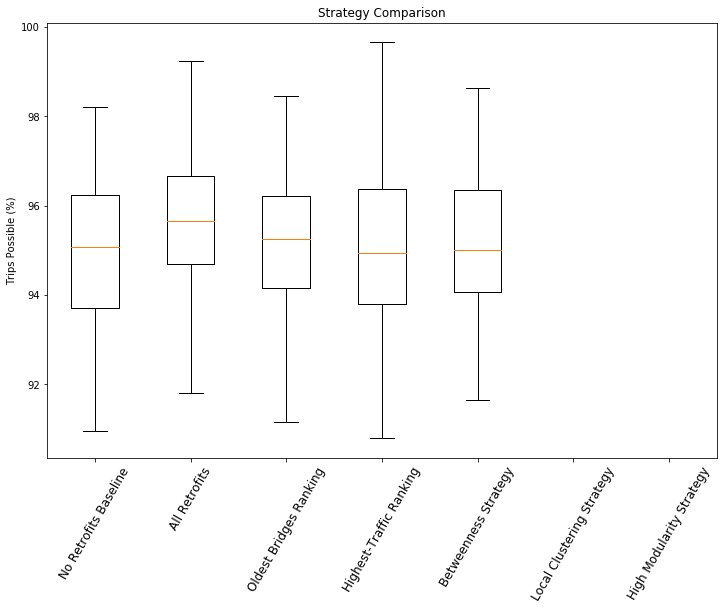

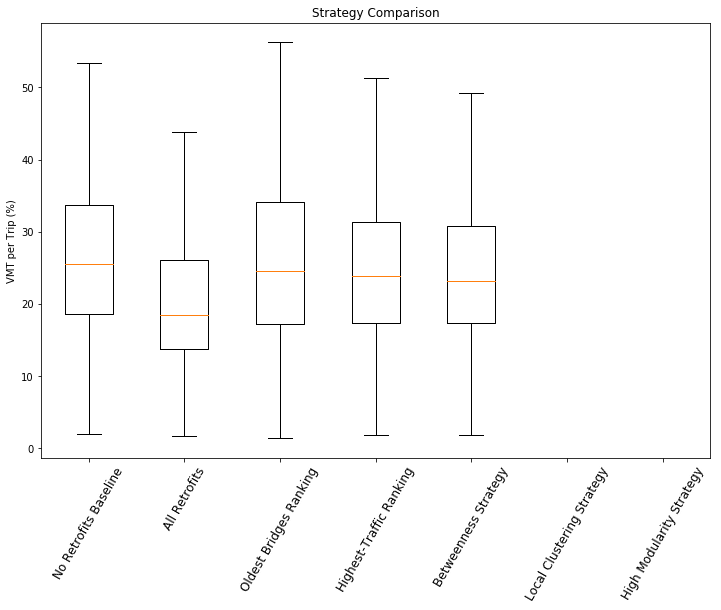

In [32]:
#plt.figure(figsize=(12, 8))
#full_data = [total_time[strat] for strat in strategies]
#plt.boxplot(full_data, 0, '')
#plt.title('Strategy Comparison')
#plt.ylabel('Travel Time Increase (%)')
#ax = plt.gca()
#titles_array = [full_titles[strat] for strat in strategies]
#ax.set_xticklabels(titles_array, rotation = 60, size=12)
#plt.show()

plt.figure(figsize=(12, 8))
full_data = [trips[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('Trips Possible (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()

plt.figure(figsize=(12, 8))
full_data = [vmt_per_trip[strat] for strat in strategies]
plt.boxplot(full_data, 0, '')
plt.title('Strategy Comparison')
plt.ylabel('VMT per Trip (%)')
ax = plt.gca()
titles_array = [full_titles[strat] for strat in strategies]
ax.set_xticklabels(titles_array, rotation = 60, size=12)
plt.show()